In [46]:
import scipy.stats as stats
import sys
import numpy as np
import tqdm
from sklearn.utils.extmath import softmax
import h5py

In [47]:
with open("d2gpo.en-de.order.txt", 'r', encoding='utf-8') as fin:
    data = fin.readlines()
data = [[item for item in line.strip().split()] for line in data if len(line.strip())>0]

In [48]:
str(data[2071][:20])

"['menschheit', 'mensch@@', 'mensch', 'menschen@@', 'menschen', 'menschliche', 'menschlichen', 'men@@', 'menschlicher', 'men', 'menschliches', 'mend@@', 'ment@@', 'ment', 'mente', 'me@@', 'menten', 'zivilisation', 'gleichheit', 'ments']"

In [59]:
import numpy as np
sample_width = 20
offset=0
def generate_gaussian(data, std, offset, mean):
    distribution_func = stats.norm(mean, std)
    x = np.arange(sample_width) + offset
    y_sample = distribution_func.pdf(x)
    y_sample = softmax(np.expand_dims(y_sample,0)).squeeze(0)
    x= np.zeros(len(data))+offset
    for i in range(sample_width):
        x[i]=y_sample[i]
    return x
def generate_linear(data, window):
    y = np.zeros(sample_width)
    for i in range(window):
        y[i]=1
    y=softmax(np.expand_dims(y,0)).squeeze(0)
    x= np.zeros(len(data))+offset
    for i in range(sample_width):
        x[i]=y[i]
    return x
    
    

In [50]:
y_sample= generate_gaussian(data, 10, 0, 0)

In [51]:
print(y_sample[:10])

[0.05076118 0.05075108 0.0507211  0.05067215 0.05060573 0.05052379
 0.05042869 0.05032305 0.05020963 0.05009125]


In [52]:
%matplotlib inline

In [53]:
import matplotlib.pyplot as plt

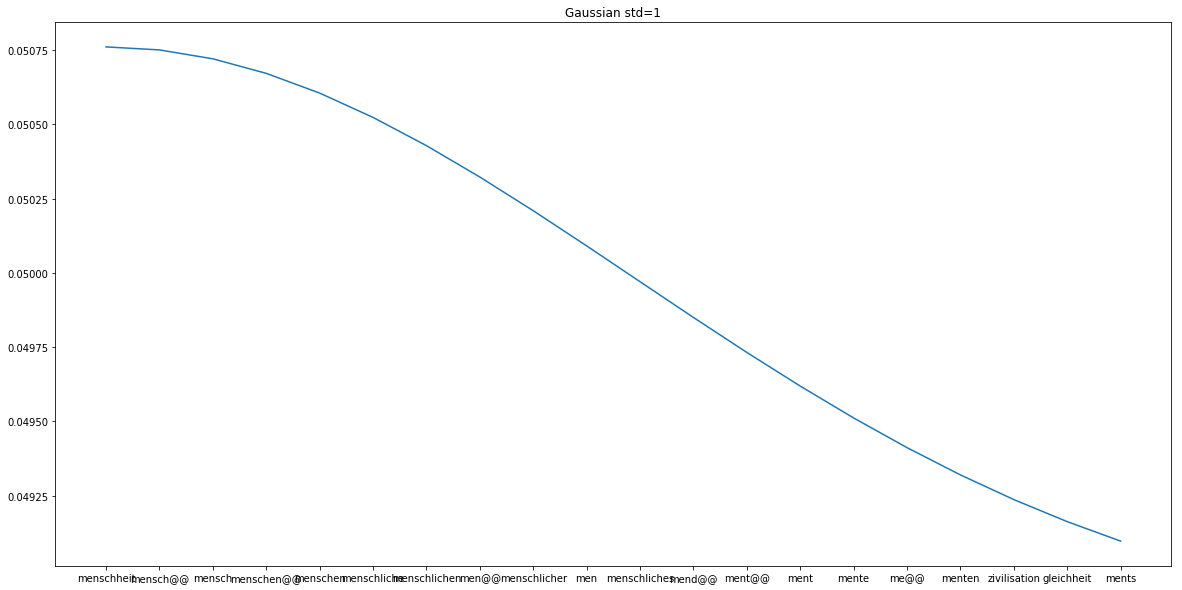

In [54]:
plt.figure(figsize=(20,10))
plt.title("Gaussian std=1")
plt.plot(data[2071][:20],y_sample[:20])

In [65]:
from pylab import *
from matplotlib.ticker import  MultipleLocator
from matplotlib.ticker import  FormatStrFormatter
xmajorLocator = MultipleLocator(3)

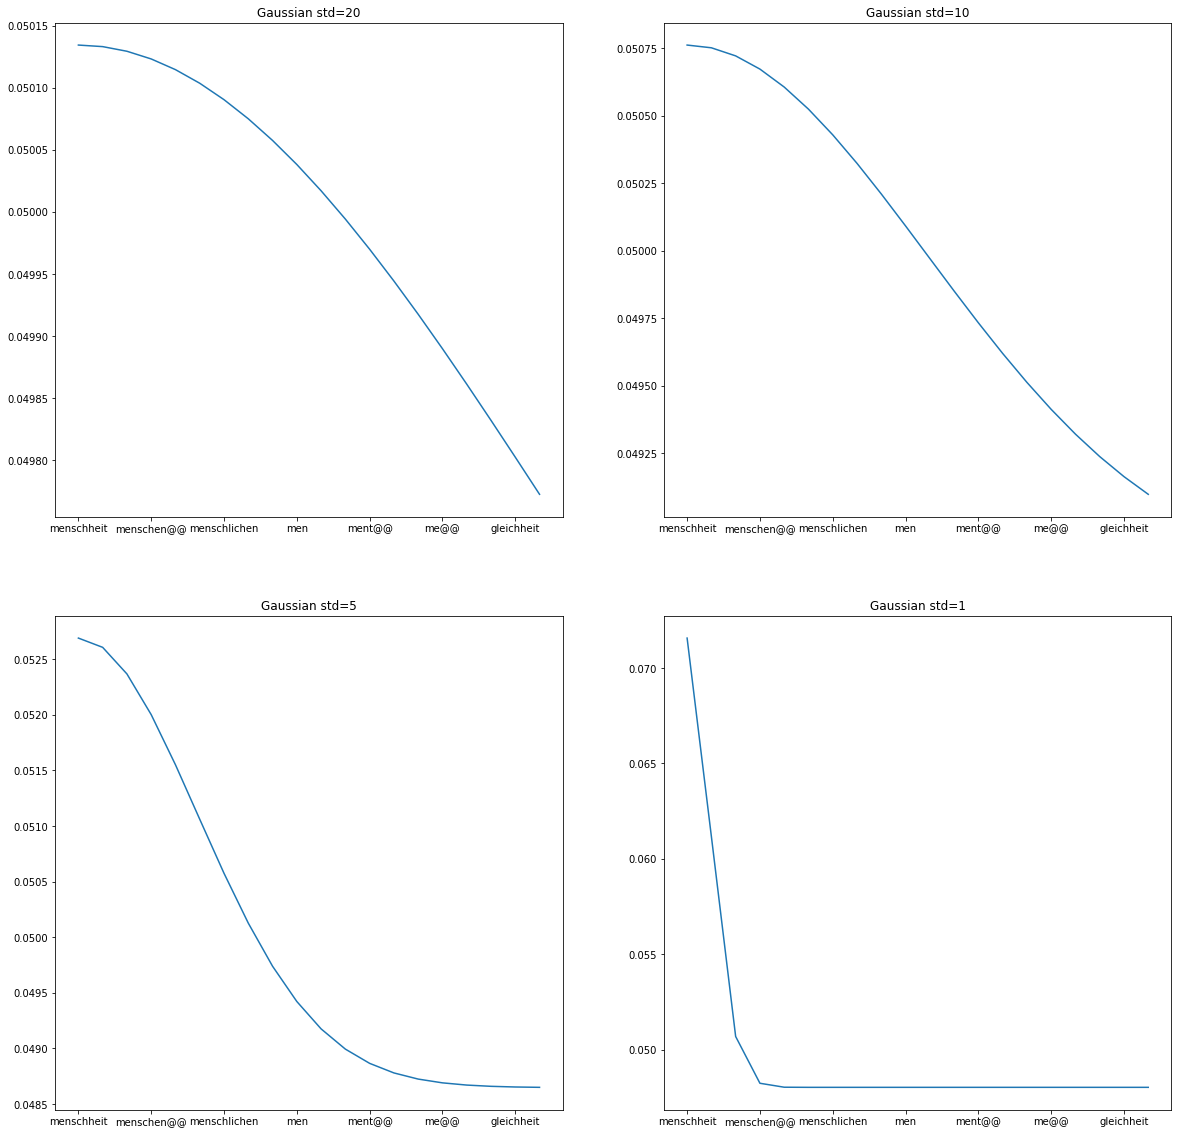

In [83]:
f, axs = plt.subplots(2,2,figsize=(20,20))

a=plt.subplot(2,2,1)
a.xaxis.set_major_locator(xmajorLocator)
y_sample= generate_gaussian(data, 20, 0, 0)
plt.title("Gaussian std=20")
plt.plot(data[2071][:20],y_sample[:20])
a=plt.subplot(2,2,2)
a.xaxis.set_major_locator(xmajorLocator)
y_sample= generate_gaussian(data, 10, 0, 0)
plt.title("Gaussian std=10")
plt.plot(data[2071][:20],y_sample[:20])
a=plt.subplot(2,2,3)
a.xaxis.set_major_locator(xmajorLocator)
y_sample= generate_gaussian(data, 5, 0, 0)
plt.title("Gaussian std=5")
plt.plot(data[2071][:20],y_sample[:20])
y_sample= generate_gaussian(data, 1, 0, 0)
a=plt.subplot(2,2,4)
a.xaxis.set_major_locator(xmajorLocator)
plt.title("Gaussian std=1")
plt.plot(data[2071][:20],y_sample[:20])
f.savefig("./Gaussians.png")

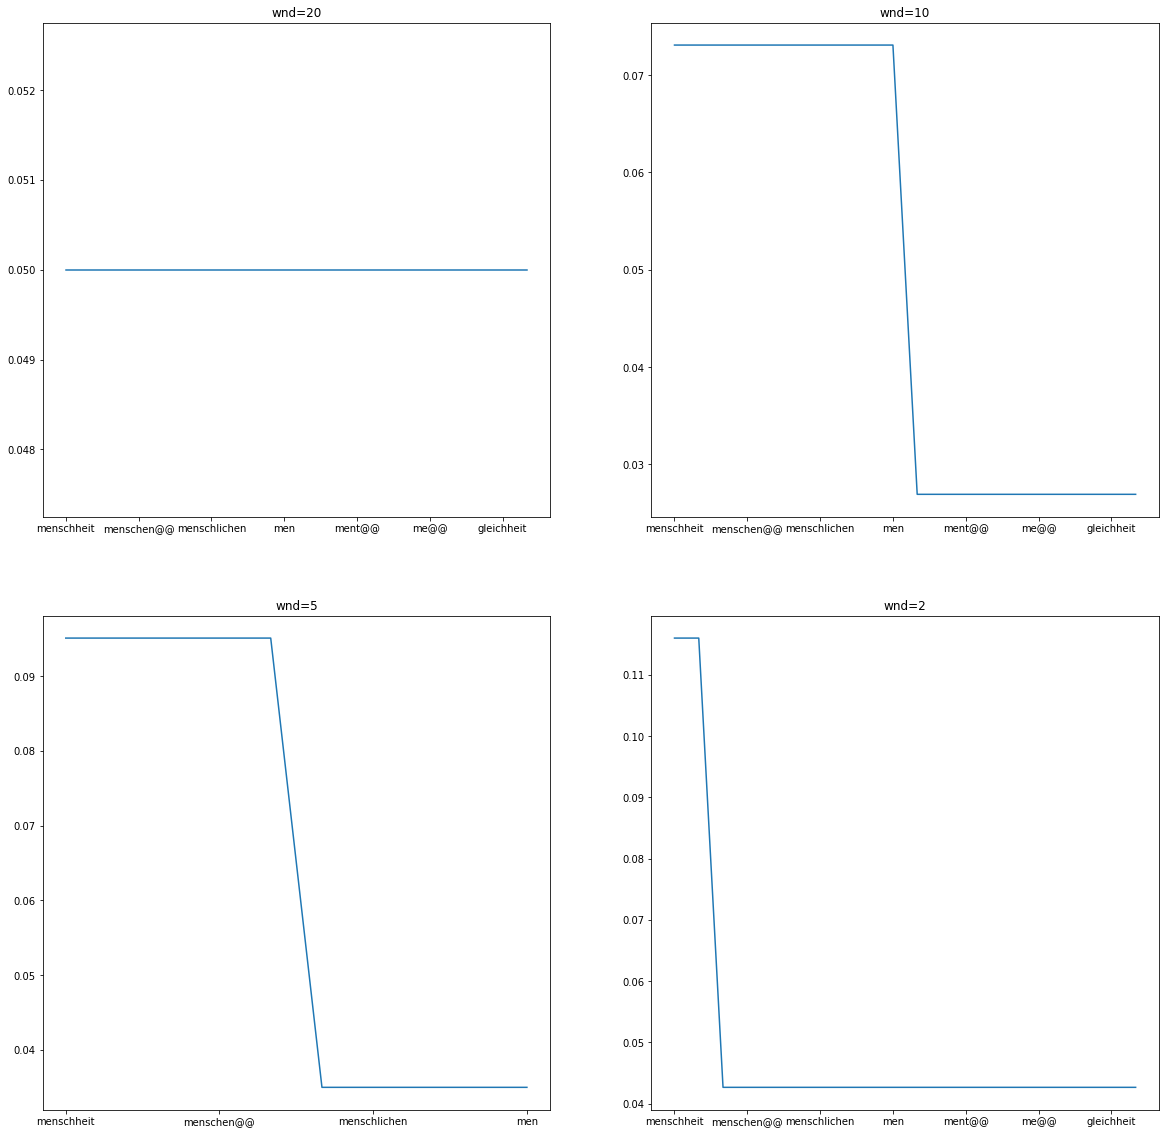

In [80]:
f, axs = plt.subplots(2,2,figsize=(20,20))
a=plt.subplot(2,2,1)
a.xaxis.set_major_locator(xmajorLocator)
y_sample= generate_linear(data, 20)
plt.title("wnd=20")
plt.plot(data[2071][:20],y_sample[:20])
a=plt.subplot(2,2,2)
a.xaxis.set_major_locator(xmajorLocator)
y_sample= generate_linear(data, 10)
plt.title("wnd=10")
plt.plot(data[2071][:20],y_sample[:20])
a=plt.subplot(2,2,3)
a.xaxis.set_major_locator(xmajorLocator)
y_sample= generate_linear(data, 5)
plt.title("wnd=5")
plt.plot(data[2071][:10],y_sample[:10])
a=plt.subplot(2,2,4)
a.xaxis.set_major_locator(xmajorLocator)
y_sample= generate_linear(data, 2)
plt.title("wnd=2")
plt.plot(data[2071][:20],y_sample[:20])
f.savefig("./Linear.png")